In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SP500ESGRiskRatings.csv')

In [3]:
df.shape

(503, 15)

In [4]:
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.30,12.80,6.60,5.80,Moderate Controversy Level,2.00,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.20,10.60,6.30,12.20,Moderate Controversy Level,2.00,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.60,0.10,8.40,14.10,Moderate Controversy Level,2.00,38th percentile,Medium


In [5]:
df.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.00,430.00,430.00,430.00,403.00
mean,21.53,5.74,6.73,9.07,2.01
std,6.89,5.09,2.21,3.66,0.79
min,7.10,0.00,3.00,0.80,1.00
25%,16.40,1.80,5.30,6.70,1.00
50%,21.05,4.05,6.10,8.90,2.00
75%,26.00,8.95,7.67,11.20,2.00
max,41.70,25.00,19.40,22.50,5.00


In [6]:
df['ESG Risk Level'].value_counts()

ESG Risk Level
Low           187
Medium        184
High           50
Negligible      6
Severe          3
Name: count, dtype: int64

In [7]:
df.columns

Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.columns

Index(['symbol', 'name', 'address', 'sector', 'industry',
       'full_time_employees', 'description', 'total_esg_risk_score',
       'environment_risk_score', 'governance_risk_score', 'social_risk_score',
       'controversy_level', 'controversy_score', 'esg_risk_percentile',
       'esg_risk_level'],
      dtype='object')

In [11]:
df['esg_risk_level'] = (
    df['esg_risk_level']
    .str.strip()
    .replace({'Negligible': 'Low', 'Severe': 'High'})
)

In [12]:
df.esg_risk_level.value_counts()

esg_risk_level
Low       193
Medium    184
High       53
Name: count, dtype: int64

In [14]:
with pd.option_context('display.max_colwidth', None):
    print(df.address.tail(10))

493                         5301 Stevens Creek Boulevard\nSanta Clara, CA 95051\nUnited States
494                                       1932 Wynnton Road\nColumbus, GA 31999\nUnited States
495                      4300 Wilson Boulevard\n11th Floor\nArlington, VA 22203\nUnited States
496                                 2485 Augustine Drive\nSanta Clara, CA 95054\nUnited States
497                                    345 Park Avenue\nSan Jose, CA 95110-2704\nUnited States
498                       1 Grand Canal Square\nGrand Canal Harbour\nDublin, D02 P820\nIreland
499                         1 North Waukegan Road\nNorth Chicago, IL 60064-6400\nUnited States
500             100 Abbott Park Road\nAbbott Park\nNorth Chicago, IL 60064-6400\nUnited States
501    11270 West Park Place\nSuite 170 PO Box 245008\nMilwaukee, WI 53224-9508\nUnited States
502                                        3M Center\nSaint Paul, MN 55144-1000\nUnited States
Name: address, dtype: object


In [15]:
df['location'] = df['address'].str.split('\n').str[-1]

In [16]:
df.location.value_counts()

location
United States     482
Ireland             9
Switzerland         4
United Kingdom      3
Bermuda             2
Netherlands         1
Canada              1
Name: count, dtype: int64

In [17]:
df.groupby('location')['esg_risk_level'].value_counts(normalize=True)

location        esg_risk_level
Bermuda         Low              0.50
                Medium           0.50
Canada          Low              1.00
Ireland         Low              0.75
                Medium           0.25
Netherlands     Low              1.00
Switzerland     Medium           0.67
                Low              0.33
United Kingdom  Low              0.50
                Medium           0.50
United States   Low              0.44
                Medium           0.43
                High             0.13
Name: proportion, dtype: float64

In [18]:
df['is_US'] = (df['location'] == 'United States').astype(int)

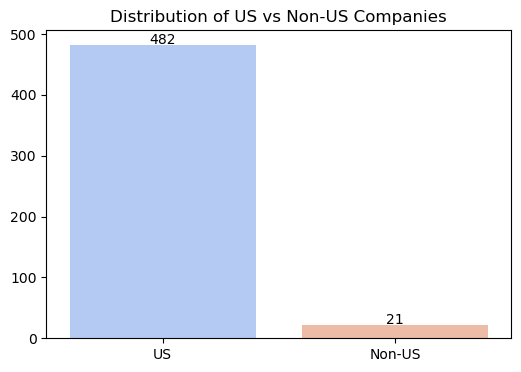

In [28]:
counts = df.is_US.value_counts()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x=['US', 'Non-US'],
    y=counts.values,
    palette='coolwarm'
)

for i, value in enumerate(counts.values):
    ax.text(i, value + 2, str(value), ha='center')

plt.title("Distribution of US vs Non-US Companies")
plt.show()

### Exploratory Data Analysis

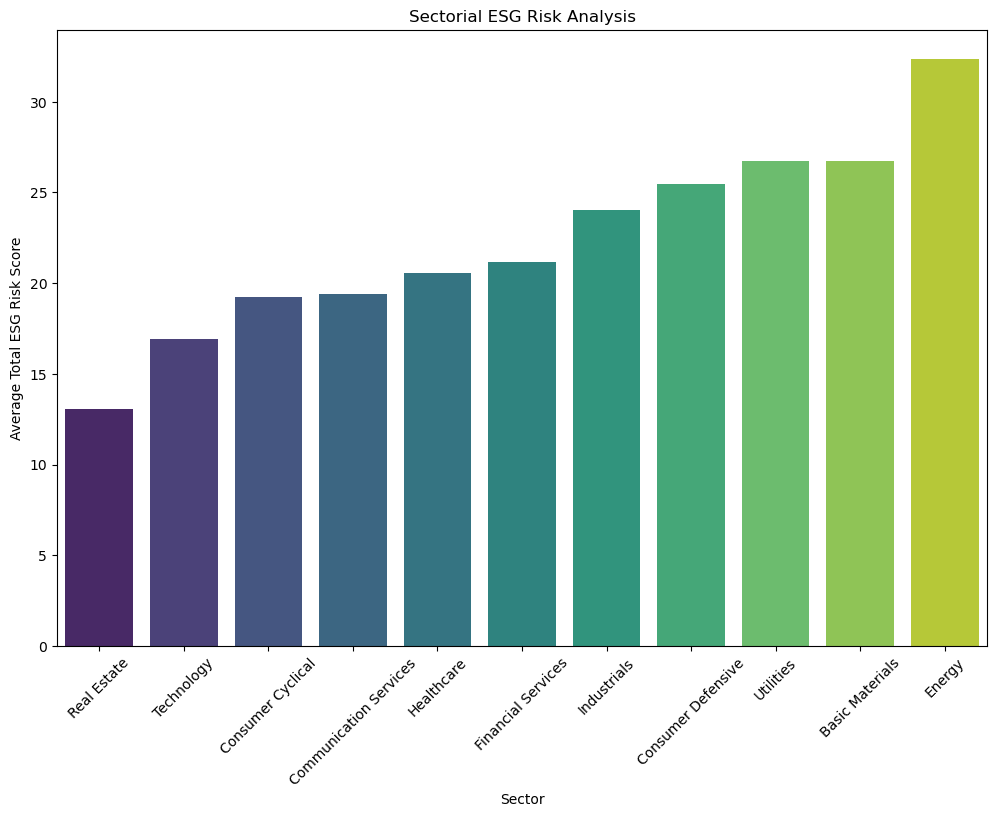

In [29]:
# BAR PLOT FOR SECTORIAL ESG RISK SCORE ANALYSIS

sectorial_risk = df.groupby('sector')['total_esg_risk_score'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=sectorial_risk.index, y=sectorial_risk.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sectorial ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

Energy Sector has highest ESG Score. This means credit granting to industries in the energy sector requires stringent scrutiny.

In [30]:
df.columns

Index(['symbol', 'name', 'address', 'sector', 'industry',
       'full_time_employees', 'description', 'total_esg_risk_score',
       'environment_risk_score', 'governance_risk_score', 'social_risk_score',
       'controversy_level', 'controversy_score', 'esg_risk_percentile',
       'esg_risk_level', 'location', 'is_US'],
      dtype='object')

In [31]:
cols_to_drop = [
    "symbol",
    "name",
    "address",
    "description",
    "location",
    "esg_risk_percentile"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

In [32]:
df.shape

(503, 11)